# Effects of People Demographics Information on Loans

## Investigation Overview

This investigation studies USA people demographics and their effects on loans amounts. The main studied variables are the **State**, **Occubation**, **Loan Type** and thier effects on **Loan Original Amount** and **BorrowerAPR**

## Dataset Overview
The dataset contains approximatly 106,000 loans information with the related people occubation, empolyment, location,... information. 7% of the original dataset is removed because of missing values.

In [10]:
#import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# Setup seaborn general plots options
# figure size fo rpage A4: 11.69, 8.27
# figure size for screen 16:9: 14.70, 8.27
plt.figure(figsize=(14.70, 8.27));
sb.set(rc={'figure.figsize':(14.70, 8.27),"axes.titlesize":18,"axes.labelsize":15, 'axes.titleweight':'bold','xtick.labelsize': 12, 'ytick.labelsize': 12},style="darkgrid")

# Hide warnings 
import warnings
warnings.simplefilter("ignore")

<Figure size 1058.4x595.44 with 0 Axes>

In [11]:
# Read the clean dataset
df = pd.read_csv("prosper_loan_data_clean.csv")

## Distribution of Loan Original Amounts
Loan Original Amount is the amount of the money the borrower takes from the bank in dollars.
75% of the studied sample have borrowed less than 12k dollars and only 25% borrowed more than this value. 35% of the entire dataset loans values are less than 4,000 ollars

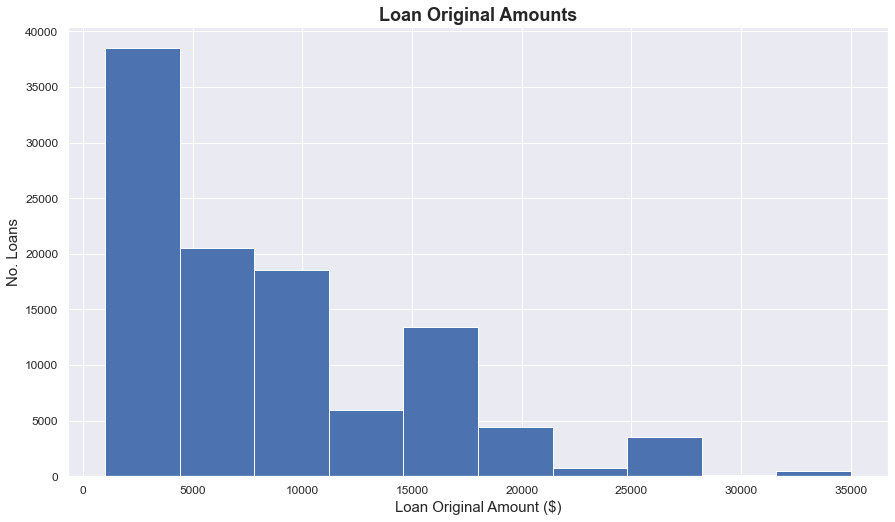

In [12]:
df['LoanOriginalAmount'].plot(kind='hist', title="Loan Original Amounts")
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("No. Loans");

## Loan Counts vs. Occubation 
- As it is known, people who have low payment jobs needs more loans, therefore, proffessionals and sales are of the people who take more loans
- In contrast, people who had high payment jobs take less loans as judges and dentists

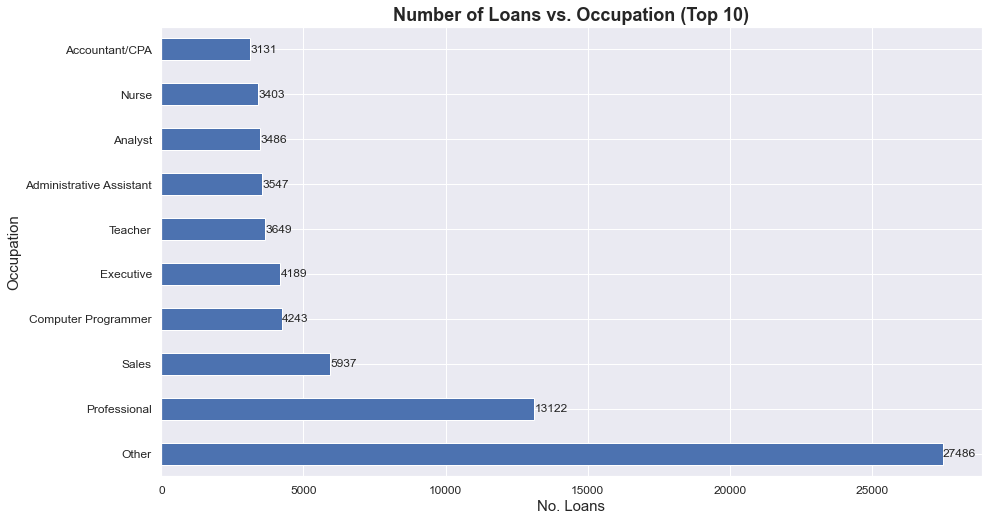

In [13]:
values = df['Occupation'].value_counts()[0:10]
values.plot(kind='barh',
            title="Number of Loans vs. Occupation (Top 10)")
plt.ylabel("Occupation");
plt.xlabel("No. Loans");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i], i), ha='left', va='center');

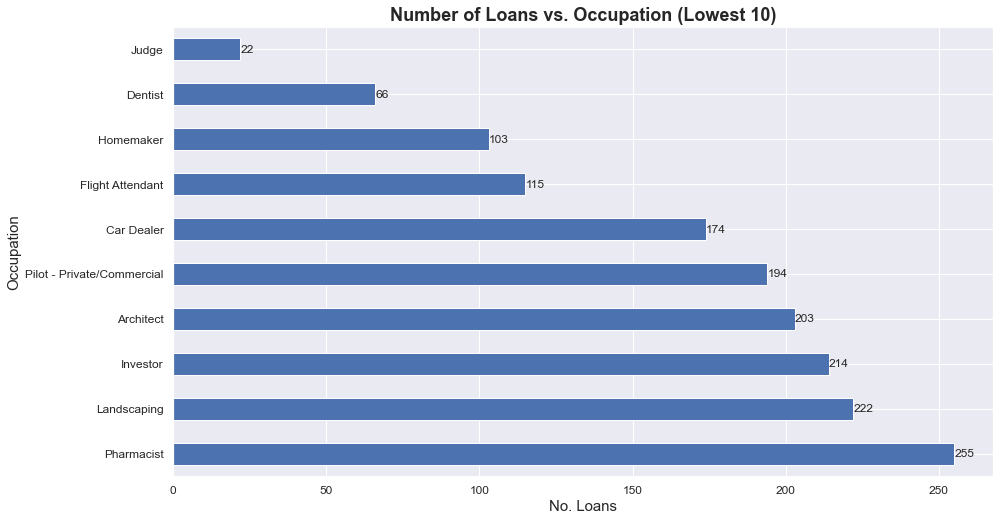

In [14]:
values = df['Occupation'].value_counts()[-10:]
values.plot(kind='barh',
            title="Number of Loans vs. Occupation (Lowest 10)")

plt.ylabel("Occupation");
plt.xlabel("No. Loans");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i], i), ha='left', va='center');

## Loan Counts vs. Loan Status 
The following defentions are for `LoanStatus` values:
   - **Chargedoff**: The account for the related loan is closed, but still shall pay the loan
   - **Defaulted**: Borrower fails to pay over the course of weeks or months.
   - **Past Due**:Past due refers to a payment that has not been made by its cutoff time at the end of its due date
   - **Current**: All payments of principal and interest then due have been paid
   - **FinalPaymentInProgress**: paying the last loan payment
   - **Completed**: Finished paying the loan
   - **Cancelled**: Cancel the loan
   
More than 83% of US borrowers pay their premiums regularly.

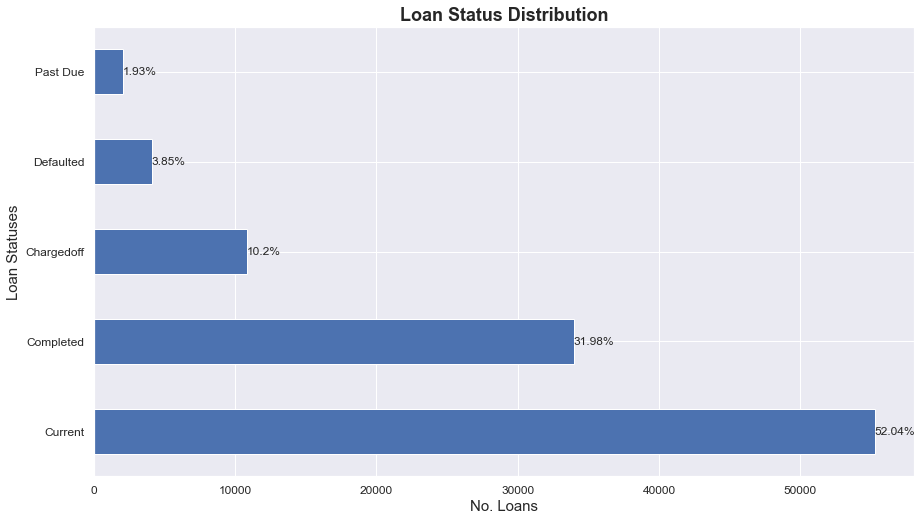

In [15]:
values=df['LoanStatus'].value_counts()
values.plot(kind='barh',title="Loan Status Distribution")
plt.ylabel("Loan Statuses")
plt.xlabel("No. Loans");
for i in range(len(values)):
    plt.annotate(str(round(values[i]/sum(values)*100,2))+"%", xy=(values[i], i), ha='left', va='center')

## Loan Counts vs. Category 
Listing Category is the category of the loan, or the reason for taking the loan. 
* 53% of the loans have the **Debt consoldiation** category (a cateogry for different loans categories for the same person consolidated one loan and one category)
* Approximately **7%** of the total number of loans are taken for **Home Imporvement**. The same goes for **Bussines** category

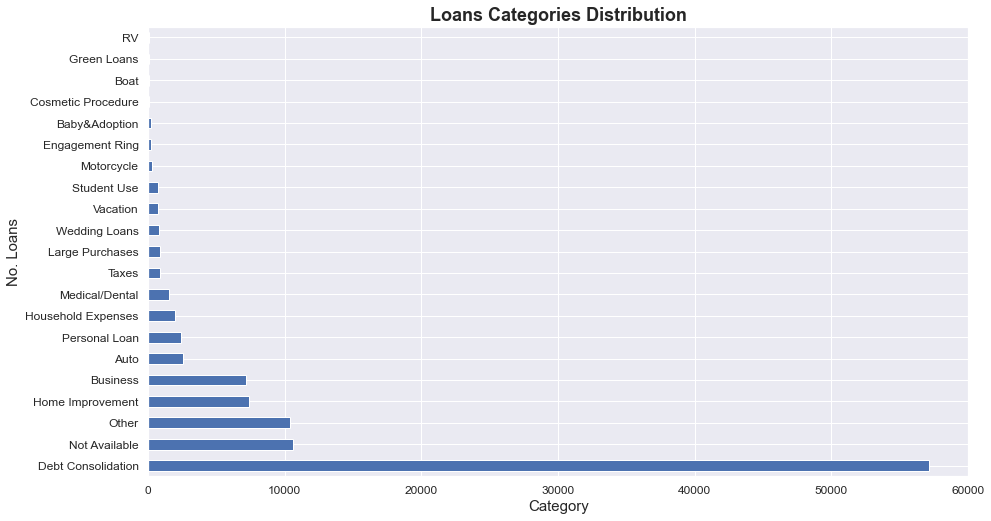

In [16]:
df['ListingCategory'].value_counts().plot(kind='barh',
                                    title="Loans Categories Distribution")
plt.xlabel("Category");
plt.ylabel("No. Loans");

## Loan Counts vs. Borrower State
* Generally, the portion of people who take loans is equal in USA states. Usually the proportion of people who take loans in this dataset equals the related state's population proportion to the entire USA population with **+-2%**
- Generally, the `LoanOriginalAmount` on average ranges are between 7,000 and 10,000 dollars regardless of the  `BorrowerStat`. However, for the smallest population states the `LoanOriginalAmount` averages are much less than that reaches to 4,244

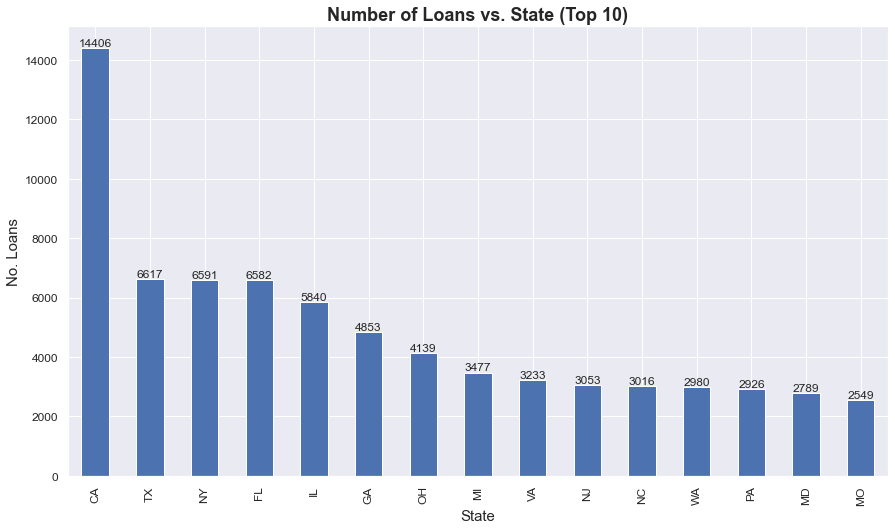

In [17]:
values = df['BorrowerState'].value_counts()[0:15]
values.plot(kind='bar', title="Number of Loans vs. State (Top 10)")
plt.xlabel("State");
plt.ylabel("No. Loans");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(i,values[i]), ha='center', va='bottom');

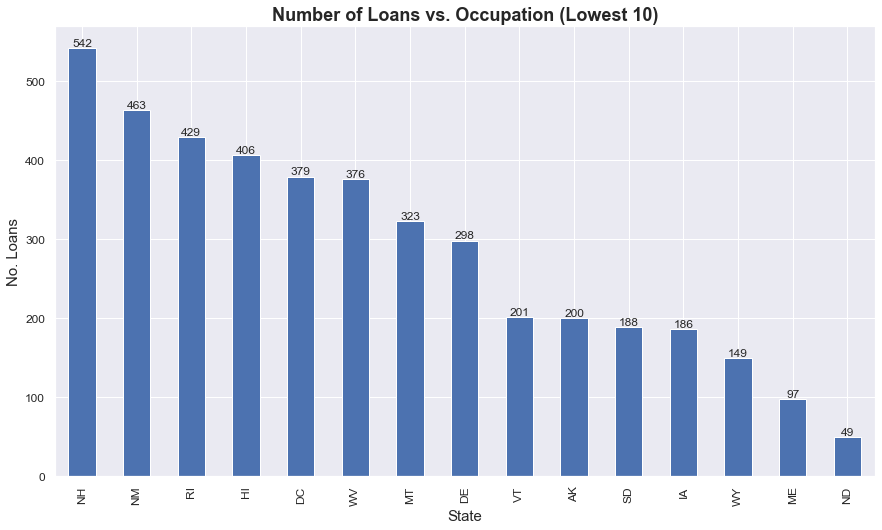

In [18]:
values = df['BorrowerState'].value_counts()[-15:]
values.plot(kind='bar',title="Number of Loans vs. Occupation (Lowest 10)")

plt.xlabel("State");
plt.ylabel("No. Loans");
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(i,values[i]), ha='center', va='bottom');

## Loan Original Amount vs. Borrower APR
**APR** is the annual cost of a loan to a borrower — including fees. Like an interest rate, the APR is expressed as a percentage. Unlike an interest rate, however, it includes other charges or fees such as mortgage insurance, most closing costs, discount points and loan origination fees.
* Larger `LoanOriginalAmount` got lower `BorrowerAPR` values

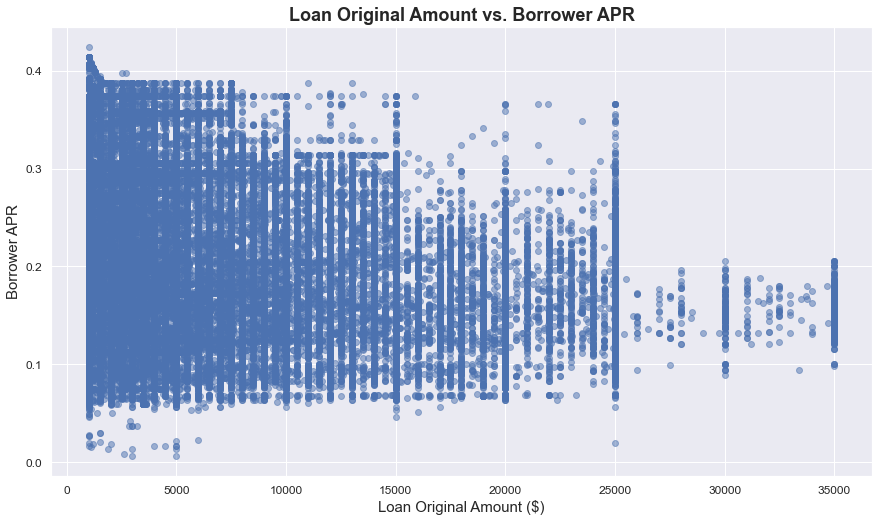

In [19]:
plt.scatter(x=df['LoanOriginalAmount'], y=df['BorrowerAPR'], alpha=0.5)

plt.xlabel("Loan Original Amount ($)")
plt.ylabel("Borrower APR")
plt.title('Loan Original Amount vs. Borrower APR');

## Loan Original Amount vs. Employment Status
Employed, and self-employed people take higher loan amountson average than other people as retired, not-employed,...
* The average of loan amounts taken by employed and self-employed people is 8,700, while the average of loan amounts taken by retired, not-employed and part-time people is 4,490 dollars

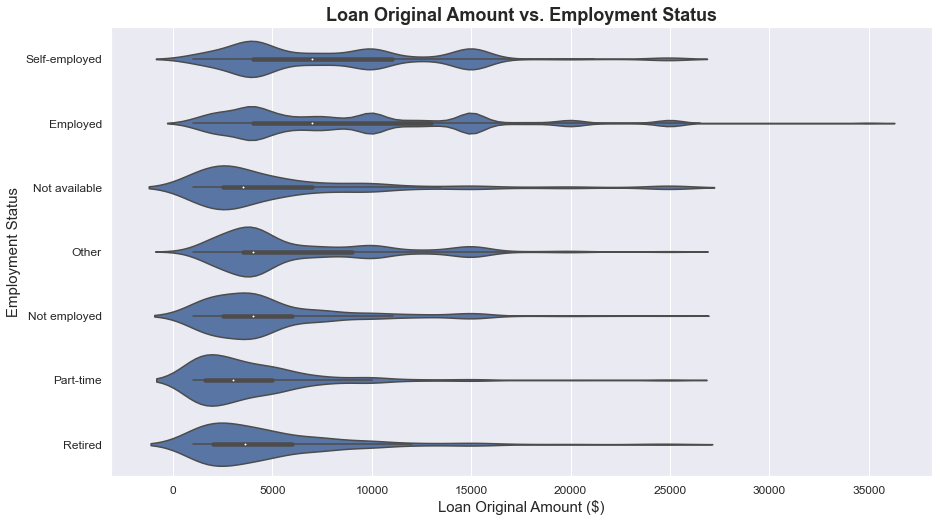

In [20]:
# let's view the relation between numric variables against the categorical variables 
sb.violinplot(data = df, x = 'LoanOriginalAmount', y = 'EmploymentStatus',
              color = sb.color_palette()[0])
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("Employment Status");
plt.title('Loan Original Amount vs. Employment Status');

## Loan Original Amount vs. Owning Home and Belonging to a group

`CurrentlyInGroup` tells if the Borrower belongs to a group or not.
And 
`IsBorrowerHomeowner`  tells if the Borrower ownning a home or not.

* The results showed that home owners usually take higher loan amounts than the people who do not
* `HomeOwners` people take larger loans than who do not. the mean loan amounts for `HomeOwners` is approx 10000, while its approx 7000 dollars for people who do not homes
* `CurrentlyInGroup` people take much less loans than who are not. 9% of the people who take loans are belonging t oa group while all other people do not.
* The mean value for the loan amounts taken by`CurrentlyInGroup` is approx 6,600, while the mean value for the people who are not is 8,700.

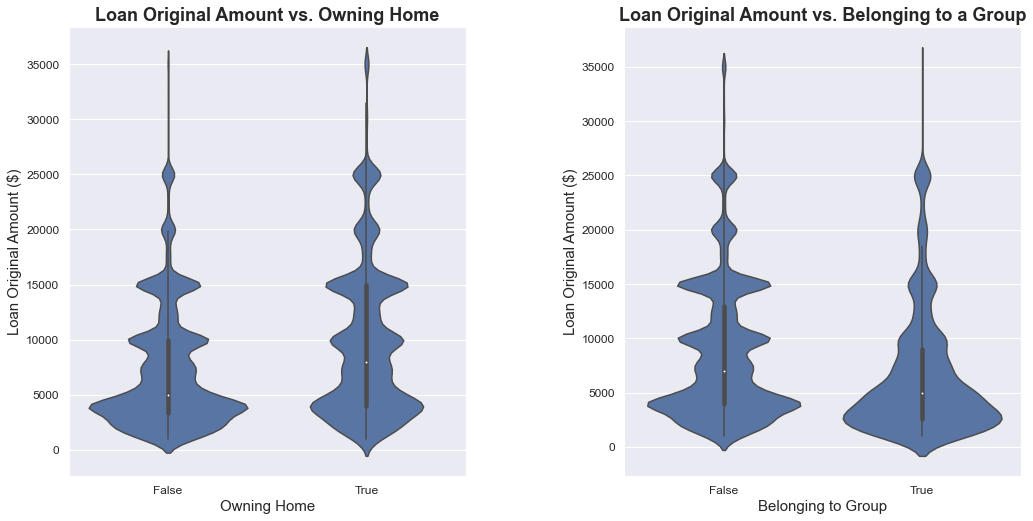

In [21]:
fig, axs = plt.subplots(ncols = 2)   

ax1 = sb.violinplot(data = df, y = 'LoanOriginalAmount', x = 'IsBorrowerHomeowner', ax = axs[0],
                  color = sb.color_palette()[0])
ax1.title.set_text("Loan Original Amount vs. Owning Home")
ax1.set_ylabel("Loan Original Amount ($)")
ax1.set_xlabel("Owning Home")


ax2 = sb.violinplot(data = df, y = 'LoanOriginalAmount', x = 'CurrentlyInGroup', ax = axs[1],
                  color = sb.color_palette()[0]);
ax2.title.set_text("Loan Original Amount vs. Belonging to a Group")
ax2.set_ylabel("Loan Original Amount ($)")
ax2.set_xlabel("Belonging to Group")

plt.subplots_adjust(left=0.1, 
                    right=1,  
                    wspace=0.4,  
                    hspace=.9) 

## Loan Original Amount by Employment Status and Loan Status
The results showed that `OriginalLoanAmount` falls in between 5000 and 6000 dollars for many scenraios. However:
- For `Current` `LoanStatus` and `Employed` `EmploymentStatus` have higher average `LoanOriginalAmount`. They on average take more than 10,000 dollars
- Generally `Completed` `LoanOriginalAmout` loans have lower values than other types especially for `Retired`, `Part-time` and `Not employed` people with the range of 3700 to 5000 dollars
- `Part-time` people have the lowest `LoanOriginalAmount` for `ChargedOff` `LoanStatus` with approximatly 3900 dollars average value
- The count of of the people in each `EmploymentStatus` and each `LoanStatus` for any employment status other than Employed is vrey few, for example the number of `Part-Time` people is 8 for the `Past Due` `LoanStatus` is 8, therefore we can see in the figure the high diversion in this category

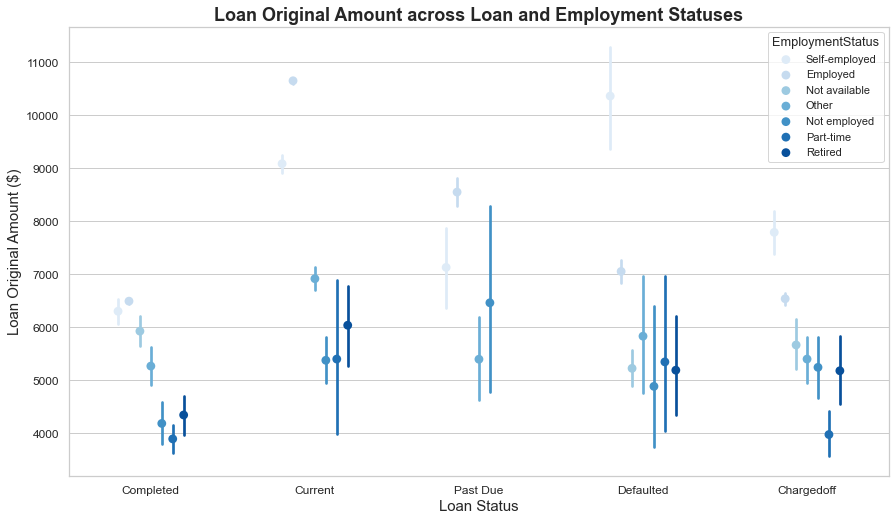

In [22]:
df_represntative = df.groupby(['LoanStatus','EmploymentStatus']).filter(lambda x: len(x) > 10)
sb.set_style("whitegrid")

ax = sb.pointplot(data = df_represntative, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Loan and Employment Statuses')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Loan Status')
plt.show();